In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yahoo_fin.stock_info import get_data
from scipy.signal import argrelextrema #to identify support and resistance



Step 1: Fetch Data from Yahoo Finance


In [2]:
ticker = "NVDA"  
start_date = "2024-01-01"
end_date = "2024-10-01"

In [3]:
data = get_data(ticker, start_date=start_date, end_date=end_date)
data.to_csv("NVDAQ324.csv")

Step 2: Load the Data

In [4]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('NVDAQ324.csv')
print(df.head())


   Unnamed: 0       open       high        low      close   adjclose  \
0  2024-01-02  49.243999  49.294998  47.595001  48.167999  48.157665   
1  2024-01-03  47.485001  48.183998  47.320000  47.569000  47.558796   
2  2024-01-04  47.766998  48.500000  47.507999  47.998001  47.987705   
3  2024-01-05  48.462002  49.547001  48.306000  49.097000  49.086464   
4  2024-01-08  49.512001  52.275002  49.479000  52.252998  52.241787   

      volume ticker  
0  411254000   NVDA  
1  320896000   NVDA  
2  306535000   NVDA  
3  415039000   NVDA  
4  642510000   NVDA  


In [5]:
# Rename 1st column to date
df.rename( columns={'Unnamed: 0':'date'}, inplace=True )

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

Step 3: Calculate Daily Returns and Volatility

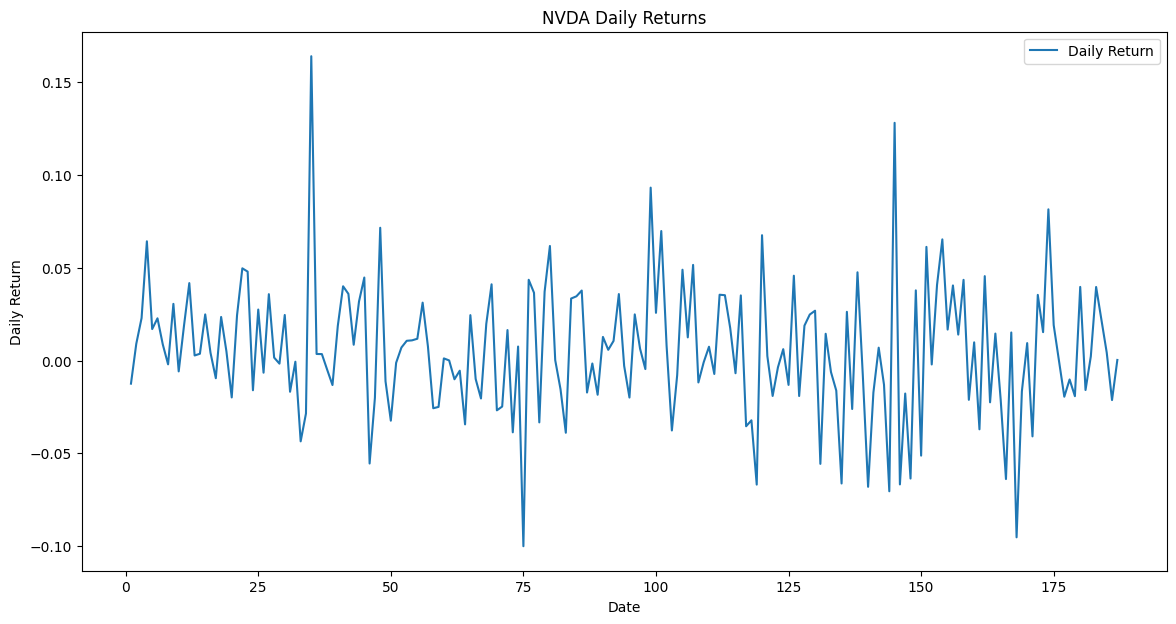

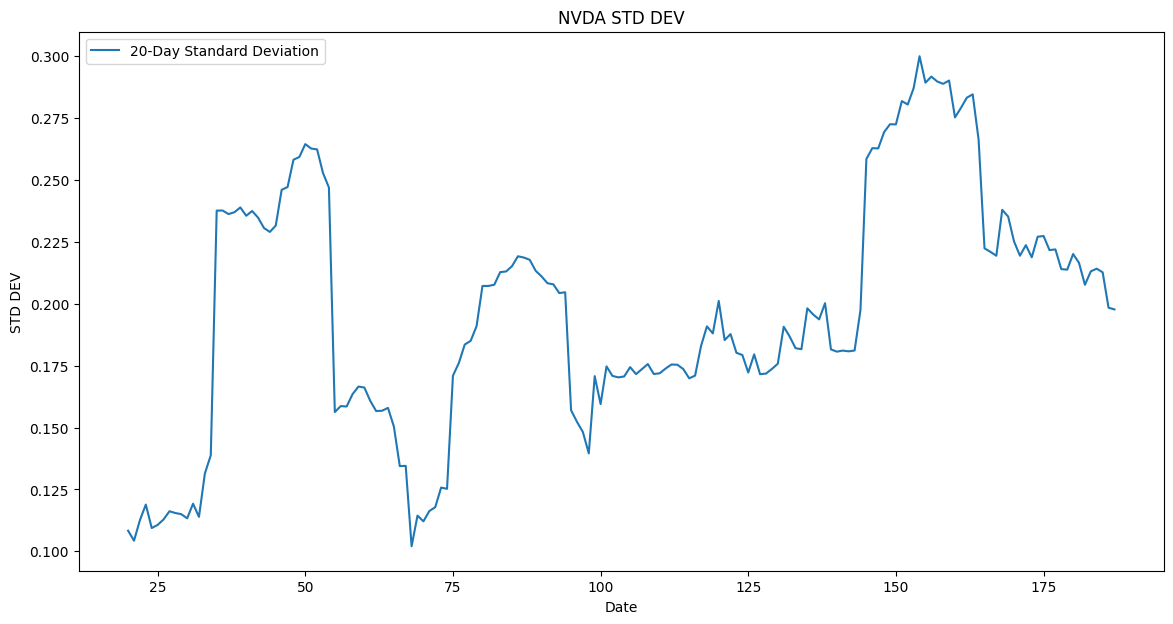

In [9]:
# Calculate and plot daily returns
df['daily_return'] = df['close'].pct_change()
# print(df.head())
plt.figure(figsize=(14,7))
plt.plot(df['daily_return'], label='Daily Return')
plt.title('NVDA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Calculate and plot rolling volatility (standard deviation)
df['std_dev'] = df['daily_return'].rolling(window=20).std() * np.sqrt(30)  # Annualized
plt.figure(figsize=(14,7))
plt.plot(df['std_dev'], label='20-Day Standard Deviation')
plt.title('NVDA STD DEV')
plt.xlabel('Date')
plt.ylabel('STD DEV')
plt.legend()
plt.show()



onclusion: 


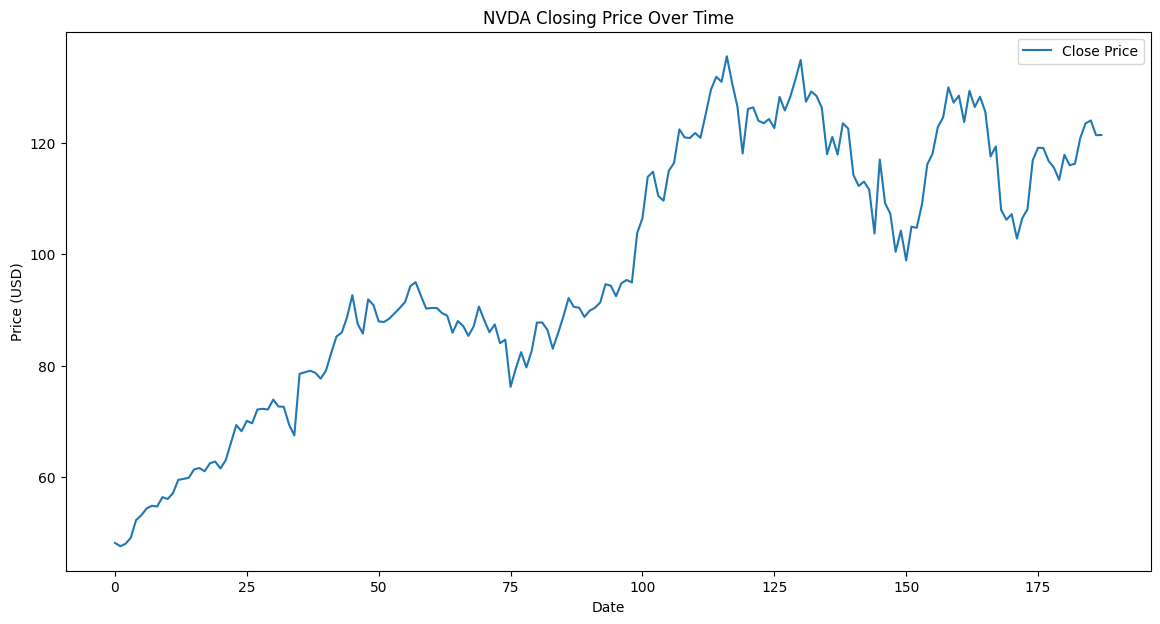

In [8]:
# Plot Closing Price (Volatility)
plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close Price')
plt.title('NVDA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Step 4: Calculate Moving Averages and Correlation between data

In [10]:
# Calculate 20-day rolling average of the closing price (for short-term trends)
df['MA20'] = df['close'].rolling(window=20).mean()

# Calculate 50-day rolling average of the closing price (for long-term trends)
df['MA50'] = df['close'].rolling(window=50).mean()


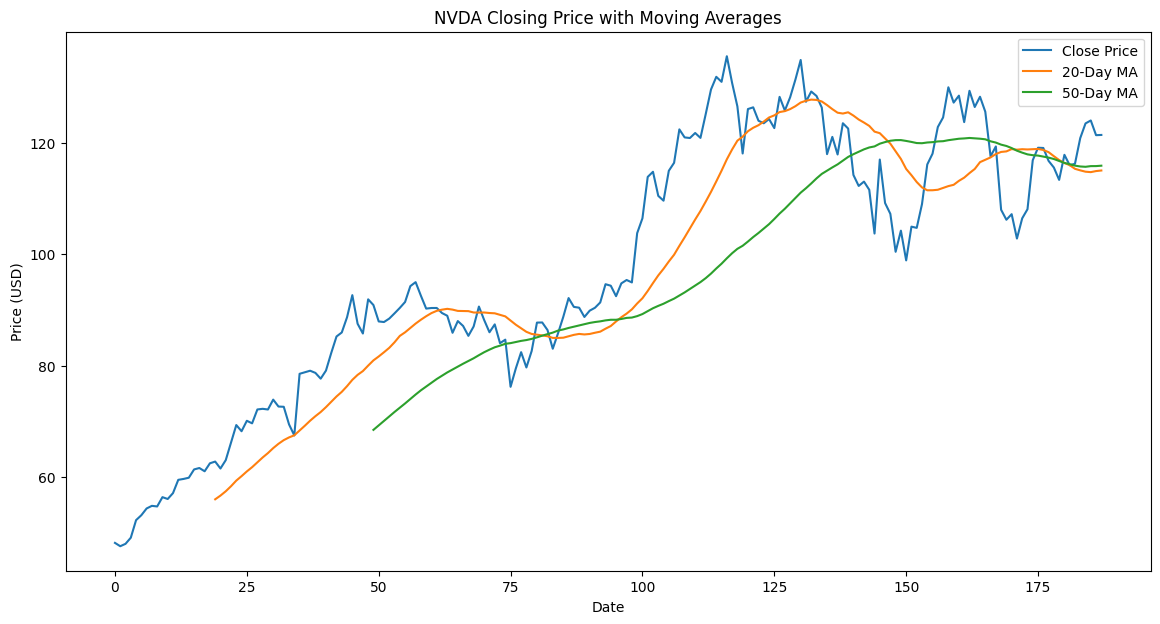

In [11]:
# Plot MA20, MA50
plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA50'], label='50-Day MA')
plt.title('NVDA Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Plot Trading volume
plt.figure(figsize=(14,7))
plt.bar(df.index, df['volume'], label='Volume')
plt.title('NVDA Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


                 close      MA20      MA50    volume  daily_return
close         1.000000  0.911508  0.713397 -0.457253     -0.033135
MA20          0.911508  1.000000  0.884249 -0.571010     -0.128526
MA50          0.713397  0.884249  1.000000 -0.523673     -0.035167
volume       -0.457253 -0.571010 -0.523673  1.000000      0.005956
daily_return -0.033135 -0.128526 -0.035167  0.005956      1.000000


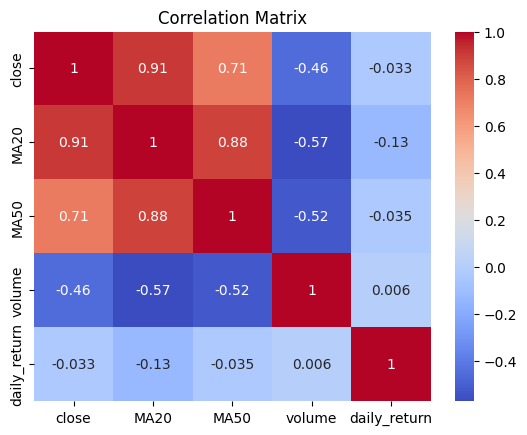

In [12]:
# Correlation matrix
corr = df[['close', 'MA20', 'MA50', 'volume', 'daily_return']].corr()
print(corr)

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 5: Identify Support and Resistance Levels

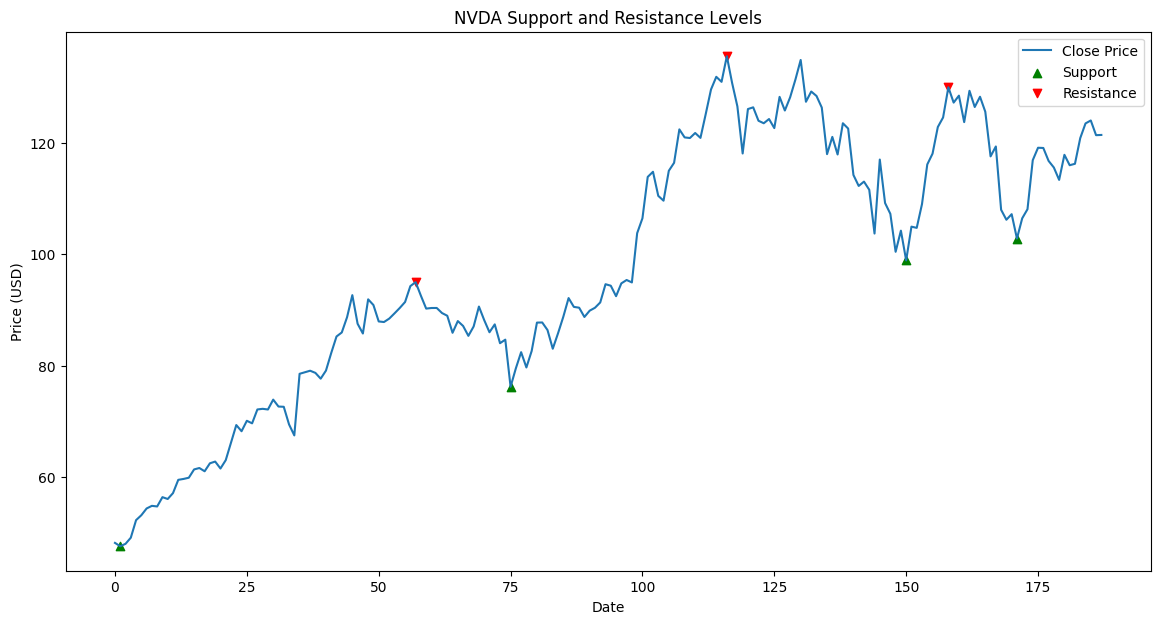

In [13]:
# Find local minima (support) and maxima (resistance)
n = 20  # number of points to consider before and after
support = df.iloc[argrelextrema(df['close'].values, np.less_equal, order=n)[0]]['close']
resistance = df.iloc[argrelextrema(df['close'].values, np.greater_equal, order=n)[0]]['close']

plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close Price')
plt.scatter(support.index, support.values, color='green', label='Support', marker='^')
plt.scatter(resistance.index, resistance.values, color='red', label='Resistance', marker='v')
plt.title('NVDA Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
